<a href="https://colab.research.google.com/github/opsifiz/AIB5_Emotion-Classification/blob/main/baseline/baseline_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Download Data Set

In [ ]:
import pandas as pd
import json

In [ ]:
!gdown https://drive.google.com/uc?id=1GCiVfkylV1hSdv6nvG5Wqt9h-8gSNf7i

Downloading...
From (original): https://drive.google.com/uc?id=1GCiVfkylV1hSdv6nvG5Wqt9h-8gSNf7i
From (redirected): https://drive.google.com/uc?id=1GCiVfkylV1hSdv6nvG5Wqt9h-8gSNf7i&confirm=t&uuid=465e3296-712b-4353-8fdd-682e6e70811a
To: /content/cleaned_dataset.csv
100% 990M/990M [00:12<00:00, 79.0MB/s]


In [49]:
df = pd.read_csv('cleaned_dataset.csv',index_col=False)
#Create Temporay Dataset where each status have 100 texts.
temp = df
temp = temp.groupby('status').head(100)
temp = temp.drop(columns=['from'])
temp = temp[temp['status'] != 'Personality disorder']
temp['predict'] = '-'
df = temp
df = df.reset_index(drop=True)
df

,text,status,predict
0,oh my gosh,Anxiety,-
1,trouble sleeping confused mind restless heart ...,Anxiety,-
2,all wrong back off dear forward doubt stay in ...,Anxiety,-
3,i have shifted my focus to something else but ...,Anxiety,-
4,i am restless and restless it is been a month ...,Anxiety,-
...,...,...,...
895,hey you all so a few years back i was supposed...,schizophrenia,-
896,my friend is too busy dealing with her own men...,schizophrenia,-
897,i feel like everything i have gone through in ...,schizophrenia,-
898,lately i have had this strange feeling like a ...,schizophrenia,-


#Baseline #3

In [50]:
df['status'].value_counts().index

Index(['Anxiety', 'Normal', 'depression', 'Suicidal', 'Stress', 'bipolar',
       'BPD', 'schizophrenia', 'mentalillness'],
      dtype='object', name='status')

In [55]:
from google import genai

client = genai.Client(api_key='GEMINI_API_KEY')

In [ ]:
def gemini_classify(txt):
  #BEGIN PROMPT
  prompt = "You are the best therapist, your work is to define this message that what kind of status is in this message, you can answer only in these following status ['Anxiety', 'Normal', 'depression', 'Suicidal', 'Stress', 'bipolar', 'BPD', 'schizophrenia', 'mentalillness'] (you can only pick one, dont pick out of this):\n\nmessage : \""+txt+"\"\n\nanswer format : {\"status\" : \"YOUR_ANSWER\"}"
  #END PROMPT
  # print(prompt)
  response = client.models.generate_content(
    model="gemini-2.0-flash-lite",
    contents=prompt,
  )
  return response.text

In [56]:
import time

for i in range(900):
  if(df.iloc[i]['predict'] != '-'):
    continue
  msg = gemini_classify(df.iloc[i]['text'])
  data = json.loads(msg)
  df.at[i, 'predict'] = data['status']
  print(i,data['status'])
  if (i+1)%100 == 0:
    df.to_csv('classify_data_'+str((i+1)//100)+'.csv')
  time.sleep(2)

df.to_csv('drive/MyDrive/baseline/baseline3.csv', index=False)

582 depression
583 bipolar
584 depression
585 depression
586 Suicidal
587 bipolar
588 depression
589 bipolar
590 Anxiety
591 bipolar
592 Stress
593 depression
594 Normal
595 bipolar
596 depression
597 Anxiety
598 depression
599 Anxiety
600 Stress
601 BPD
602 BPD
603 Anxiety
604 depression
605 BPD
606 BPD
607 BPD
608 schizophrenia
609 depression
610 BPD
611 Stress
612 Anxiety
613 Suicidal
614 BPD
615 Anxiety
616 Suicidal
617 Anxiety
618 Anxiety
619 Stress
620 Anxiety
621 Anxiety
622 depression
623 BPD
624 BPD
625 Normal
626 BPD
627 Normal
628 BPD
629 Stress
630 Anxiety
631 depression
632 BPD
633 depression
634 Stress
635 Suicidal
636 Normal
637 Anxiety
638 depression
639 depression
640 Anxiety
641 BPD
642 Anxiety
643 schizophrenia
644 Normal
645 Normal
646 Stress
647 BPD
648 BPD
649 BPD
650 depression
651 Normal
652 BPD
653 BPD
654 BPD
655 BPD
656 depression
657 BPD
658 BPD
659 BPD
660 Stress
661 Anxiety
662 Anxiety
663 BPD
664 Suicidal
665 BPD
666 Anxiety
667 Anxiety
668 Anxiety
669 Su

In [57]:
df.describe()

,text,status,predict
count,900,900,900
unique,900,9,12
top,it does not help that it is my trauma month in...,Anxiety,Anxiety
freq,1,100,192


In [58]:
df['predict'].value_counts()

,count
predict,
Anxiety,192
Stress,149
depression,141
Normal,132
Suicidal,131
BPD,51
schizophrenia,45
bipolar,40
mentalillness,14


In [59]:
df.loc[df['predict'] == 'Bipolar', 'predict'] = 'bipolar'
df.loc[df['predict'] == 'Depression', 'predict'] = 'depression'

In [60]:
all_status = df['status'].unique()
all_status

array(['Anxiety', 'Normal', 'depression', 'Suicidal', 'Stress', 'bipolar',
       'BPD', 'schizophrenia', 'mentalillness'], dtype=object)

In [61]:
accuracy = ((df['predict']==df['status']).sum())/1000
print(accuracy)

0.432


<Figure size 800x600 with 0 Axes>

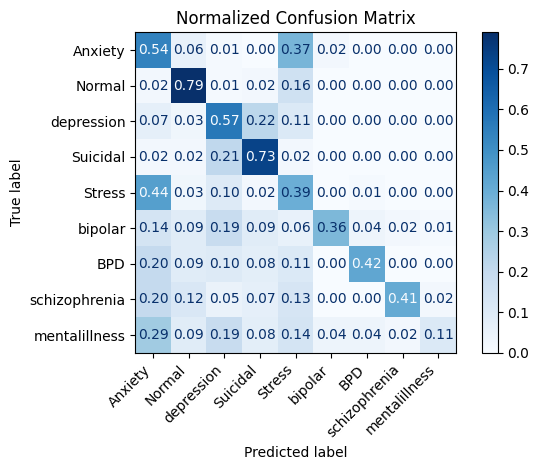

In [62]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

candidate_labels = all_status

# Compute normalized confusion matrix
cm = confusion_matrix(df['status'], df['predict'], labels=candidate_labels, normalize='true')

# Display normalized confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=candidate_labels)

plt.figure(figsize=(8, 6))
disp.plot(cmap="Blues", values_format=".2f")
plt.xticks(rotation=45, ha='right')
plt.title("Normalized Confusion Matrix")
plt.tight_layout()
plt.show()